## Instagram Reach Analysis

#### objective-
* to analyse the trend and pattern 
* to find which engagement feature leads to highest impressions
* to create a predictive model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Data exploration

In [2]:
data=pd.read_csv('datasets/Instagram_data.csv',encoding='latin1')

In [3]:
data.head(5)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


there are no null values and the data types do not require changing

In [5]:
data.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


#### number of unique hashtags

In [6]:
data['Hashtags'].nunique()

54

#### number of unique captions

In [7]:
data['Caption'].nunique()

90

### Correlation Analysis

In [32]:
corr_mat=data.iloc[:,0:11].corr()
corr_mat

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
Impressions,1.000000,0.844698,0.560760,0.893607,0.592960,0.779231,-0.028524,0.634675,0.849835,0.760981,0.889363
From Home,0.844698,1.000000,0.177516,0.800573,0.555666,0.768817,0.012716,0.674985,0.698330,0.531076,0.672675
From Hashtags,0.560760,0.177516,1.000000,0.190453,0.229623,0.305929,0.161439,0.219511,0.662124,0.691345,0.555485
From Explore,0.893607,0.800573,0.190453,1.000000,0.495685,0.747803,-0.158565,0.615731,0.653699,0.531850,0.796019
From Other,0.592960,0.555666,0.229623,0.495685,1.000000,0.331907,-0.108703,0.156834,0.393510,0.633080,0.546737
Saves,0.779231,0.768817,0.305929,0.747803,0.331907,1.000000,-0.026912,0.860324,0.845643,0.360628,0.628461
Comments,-0.028524,0.012716,0.161439,-0.158565,-0.108703,-0.026912,1.000000,0.016933,0.123586,0.096714,-0.060631
Shares,0.634675,0.674985,0.219511,0.615731,0.156834,0.860324,0.016933,1.000000,0.707794,0.245361,0.493070
Likes,0.849835,0.698330,0.662124,0.653699,0.393510,0.845643,0.123586,0.707794,1.000000,0.626107,0.746333
Profile Visits,0.760981,0.531076,0.691345,0.531850,0.633080,0.360628,0.096714,0.245361,0.626107,1.000000,0.853152


<Axes: >

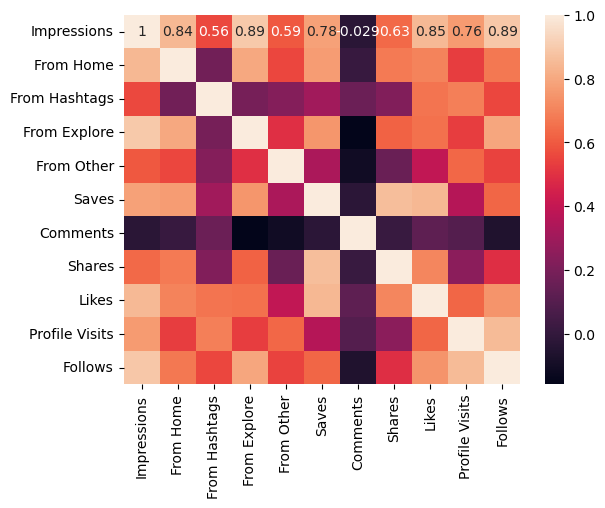

In [9]:
sns.heatmap(corr_mat,annot=True)

### Feautre engineering

#### calculating engagement rate 
 shows percentage of people who have been shown the post and have interacted with it.

In [10]:
data['Engagement Rate']=(data['Likes']+data['Comments']+data['Shares'])/data['Impressions']

In [11]:
data.head(4)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Engagement Rate
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,0.044898
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,0.045421
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,0.035563
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,0.050795


#### calculating conversion rate
conversion rate means how many followers are you getting from the number of profile visits from a post.

In [12]:
conversion_rate=(data['Follows'].sum()/data['Profile Visits'].sum())*100
print(conversion_rate)

41.00265604249668


### Analyzing trends and patterns

#### reach over time 

Text(0, 0.5, 'impressions')

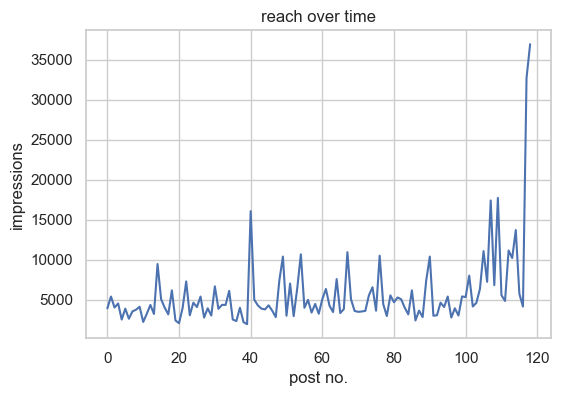

In [13]:
sns.set(palette='deep',rc={"figure.figsize": (6, 4)},style='whitegrid')
sns.lineplot(x=data.index,y=data['Impressions'])
plt.title('reach over time')
plt.xlabel('post no.')
plt.ylabel('impressions')

#### sources of impressions

Text(0.5, 1.0, 'impressions on instagram posts from various sources')

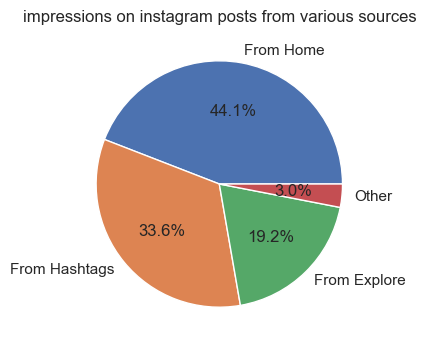

In [14]:
values=[data['From Home'].sum(),data['From Hashtags'].sum(),data['From Explore'].sum(),data['From Other'].sum()]
labels=['From Home','From Hashtags','From Explore','Other']
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%2.1f%%')
plt.title('impressions on instagram posts from various sources')

#### most used hashtags

In [15]:
!pip install wordcloud  -q
from wordcloud import WordCloud

(-0.5, 899.5, 499.5, -0.5)

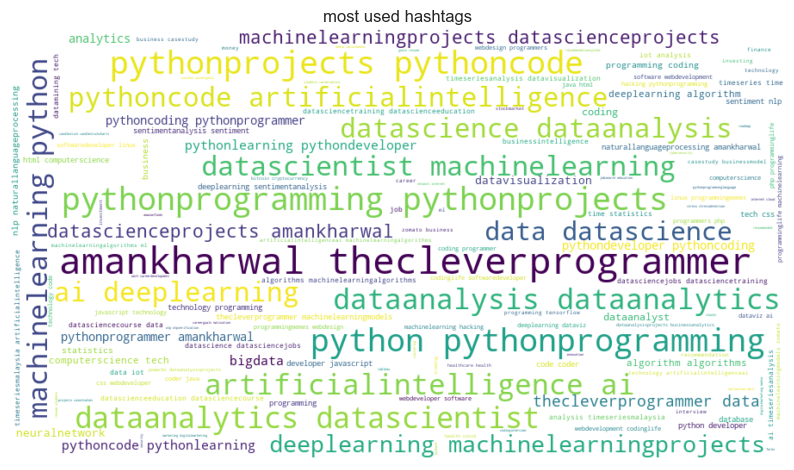

In [16]:
hashtags=' '.join(data['Hashtags'].tolist())
wordcloud=WordCloud(width=900,height=500,background_color='white').generate(hashtags)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('most used hashtags')
plt.axis('off')

#### realtionship between impressions and number of comments

<Axes: xlabel='Comments', ylabel='Impressions'>

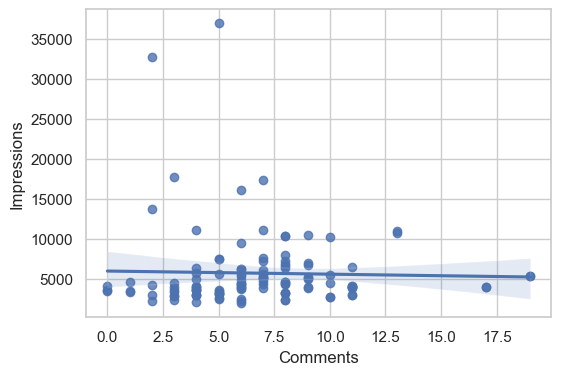

In [17]:
sns.regplot(x='Comments',y='Impressions',data=data)

comments do not affect the reach

#### realtionship between impressions and likes

<Axes: xlabel='Likes', ylabel='Impressions'>

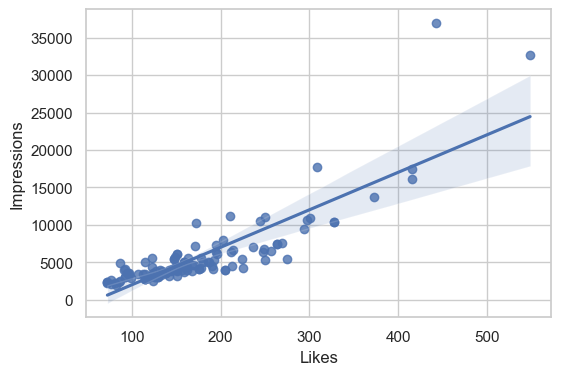

In [18]:
sns.regplot(x='Likes',y='Impressions',data=data)

positive relationship

#### realtionship between impressions and saves

<Axes: xlabel='Saves', ylabel='Impressions'>

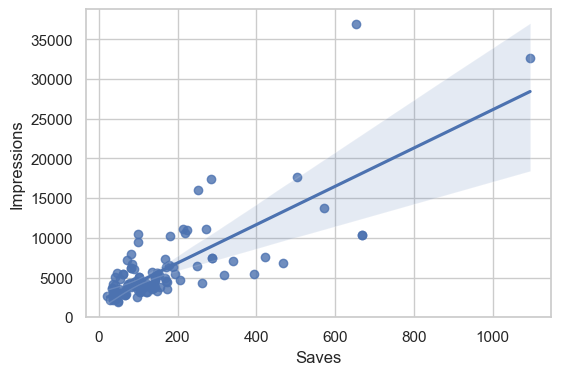

In [19]:
sns.regplot(x='Saves',y='Impressions',data=data)

positive relationship

#### relationship between impressions and shares

<Axes: xlabel='Shares', ylabel='Impressions'>

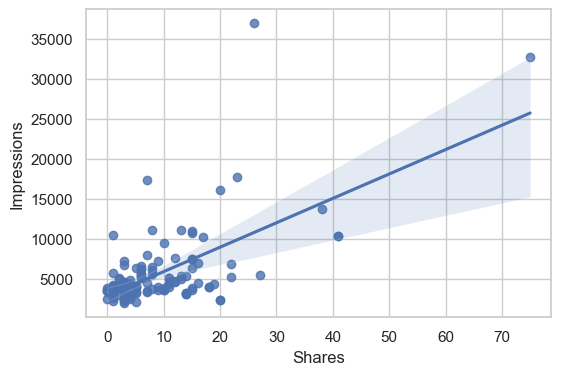

In [20]:
sns.regplot(x='Shares',y='Impressions',data=data)

positive relationship

### Predictive Modeling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
x=data.drop(['Impressions','Hashtags','Caption'],axis=1)
y=data['Impressions']

#### splitting the data

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=98)

#### trainig machine learning model

In [24]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

#### make predictions

In [25]:
y_pred=model.predict(x_test)

#### evaluate the model

In [26]:
r2=r2_score(y_test,y_pred)
print('r-squared score ',r2)

r-squared score  0.9968852961962814


* 99.99% of the variance in the actual values is explained by the model's predictions.
*  model's predictions are very close to the actual values.

#### finding most important feature 
which form  of engagement results in higher impressions

In [28]:
x1=data.iloc[:,5:11]
y1=data['Impressions']
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=98)
model1=LinearRegression()
model1.fit(x1_train,y1_train)
coefficients = model1.coef_
feature_importance = pd.Series(coefficients, index=x1.columns).sort_values(ascending=False)
print(feature_importance)

Follows           32.402341
Profile Visits    17.422903
Saves             13.847161
Likes              6.305516
Shares             3.345978
Comments         -35.382578
dtype: float64


the impressions increases most when number of folowers increase

when 1 person follows the instagram page the impressions incease by approximately 32